# MOwNiT
## Laboratorium
### Całkowanie

In [1]:
using Pkg
#Pkg.add("QuadGK")
using QuadGK
using Polynomials

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki
(xp, a) = gauss(Float64,7);

In [3]:
xp

7-element Vector{Float64}:
 -0.9491079123427585
 -0.7415311855993945
 -0.4058451513773972
  0.0
  0.4058451513773972
  0.7415311855993945
  0.9491079123427585

In [4]:
a

7-element Vector{Float64}:
 0.12948496616886981
 0.2797053914892767
 0.38183005050511887
 0.41795918367346907
 0.38183005050511887
 0.2797053914892767
 0.12948496616886981

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [5]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni (uwaga: dobrać takie współczynniki wielomianów, aby całka nie zerowała się w przedziale [-1.1])
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


In [ ]:
using Polynomials
using Plots

# Funkcja generująca wielomiany Legendre'a do stopnia n
function legendre_polynomials(n)
    P = [Polynomial{Float64}([1.0]), Polynomial{Float64}([0.0, 1.0])]  # P₀(x) = 1, P₁(x) = x

    for k in 1:n-1
        Pk = P[end]
        Pkm1 = P[end - 1]
        coeff1 = (2k + 1) / (k + 1)
        coeff2 = k / (k + 1)
        nextP = coeff1 * Polynomial{Float64}([0.0, 1.0]) * Pk - coeff2 * Pkm1
        push!(P, nextP)
    end
    return P
end

# Rysowanie i zapisywanie wykresu
function plot_legendre_and_save(n, filename)
    P = legendre_polynomials(n)
    x = -1:0.01:1
    plt = plot(title="Wielomiany Legendre'a", xlabel="x", ylabel="Pₙ(x)", legend=:topright)
    for (i, p) in enumerate(P)
        plot!(plt, x, p.(x), label="P_$((i - 1))(x)")
    end
    savefig(plt, filename)
    println("Wykres zapisany jako $filename")
end

plot_legendre_and_save(5, "zad1.png")


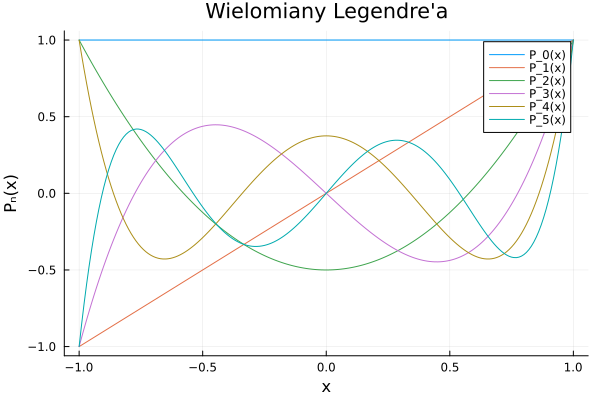

In [ ]:
using FastGaussQuadrature
using Polynomials
using Plots
using QuadGK

function gauss_integrate(f, k)
    xp, a = gauss(k)
    return sum(a .* f.(xp))
end

function test_gauss_accuracy(max_degree, max_k, filename="gauss_accuracy.png")
    errors = fill(NaN, max_degree+1, max_k)

    for deg in 0:max_degree
        coeffs = [1.0 for _ in 1:(deg+1)]  # wszystkie współczynniki = 1.0
        p = Polynomial(coeffs)
        exact, _ = quadgk(p, -1, 1)

        for k in 1:max_k
            approx = gauss_integrate(p, k)
            err = abs(exact - approx)
            errors[deg+1, k] = max(err, 1e-20)  # unikaj log10(0)
        end
    end

    plt = heatmap(
        1:max_k, 0:max_degree, log10.(errors),
        xlabel="Liczba punktów Gaussa (k)",
        ylabel="Stopień wielomianu",
        title="Log10 błędu całkowania Gaussa",
        colorbar_title="log₁₀(błąd)",
        yflip=true
    )

    savefig(plt, filename)
    println("Wykres zapisany jako $filename")
    return plt
end

test_gauss_accuracy(15, 10, "zad2.png")


function gauss_integrate(f, k, a=-1.0, b=1.0)
    xp, w = gauss(k)  # xp - węzły, w - wagi na [-1,1]
    # Zmiana zmiennej: x = (b+a)/2 + (b-a)/2 * z
    xz = (b + a)/2 .+ (b - a)/2 .* xp
    return (b - a)/2 * sum(w .* f.(xz))
end

f1(x) = x^2
f2(x) = sin(x)
f3(x) = exp(x)

println("Integral[0,1] x^2 dx = ", gauss_integrate(f1, 5, 0.0, 1.0), " (oczekiwane: 1/3 = ", 1/3, ")")
println("Integral[0,pi] sin(x) dx = ", gauss_integrate(f2, 5, 0.0, Float64(pi)), " (oczekiwane: 2)")
println("Integral[0,1] e^x dx = ", gauss_integrate(f3, 5, 0.0, 1.0), " (oczekiwane: e - 1 = ", exp(1) - 1, ")")


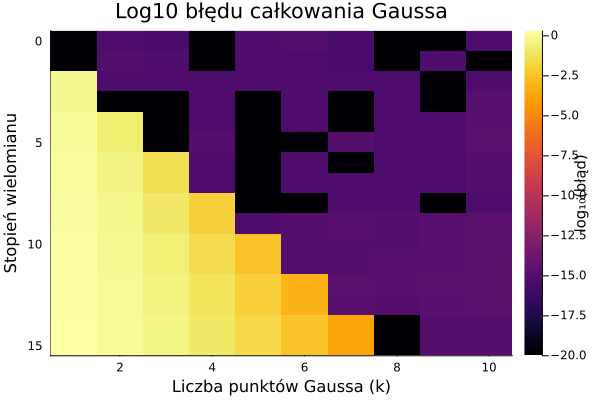

Integral[0,2] x^2 dx = 2.666666666666666 (oczekiwane: 8/3 = 2.6666666666666666)

Integral[0,pi] sin(x) dx = 2.0000001102844713 (oczekiwane: 2)

Integral[0,2] e^x dx = 6.389056096688673 (oczekiwane: e^2 - 1 = 6.38905609893065)

In [ ]:
using QuadGK, Polynomials

p = Polynomial([1, 2, 3])  # 1 + 2x + 3x^2

val, err = quadgk(p, -1, 2)
println("∫_{-1}^{2} (3x² + 2x + 1) dx = $val (błąd oszacowany: $err)")

gauss_pdf(x) = 1 / sqrt(2π) * exp(-x^2 / 2)

val, err = quadgk(gauss_pdf, -Inf, Inf)
println("∫_{-∞}^{∞} N(0,1)(x) dx = $val (błąd oszacowany: $err)")

∫_{-1}^{2} (3x² + 2x + 1) dx = 15.0 (błąd oszacowany: 3.552713678800501e-15)

∫_{-∞}^{∞} N(0,1)(x) dx = 1.0000000000032583 (błąd oszacowany: 1.4395584886006938e-8)

In [ ]:
using Plots
using QuadGK

# Metoda prostokątów (środków)
function rectangle_rule(f, a, b, n)
    h = (b - a) / n
    x = a .+ h .* (0.5 .+ (0:n-1))
    return h * sum(f.(x))
end

# Metoda trapezów
function trapezoidal_rule(f, a, b, n)
    h = (b - a) / n
    x = range(a, stop=b, length=n+1)
    return h * (0.5*f(a) + sum(f.(x[2:end-1])) + 0.5*f(b))
end

# Metoda Simpsona (n musi być parzyste)
function simpson_rule(f, a, b, n)
    if n % 2 != 0
        error("Dla metody Simpsona liczba podprzedziałów (n) musi być parzysta")
    end
    h = (b - a) / n
    x = a .+ h .* (0:n)
    return h/3 * (f(a) + 2*sum(f.(x[2:2:end-2])) + 4*sum(f.(x[1:2:end])) + f(b))
end



function plot_errors(f, a, b, exact_val, max_n=1000; label="")
    ns = 2:2:max_n
    hs = (b - a) ./ ns
    err_rect = [abs(rectangle_rule(f, a, b, n) - exact_val) for n in ns]
    err_trap = [abs(trapezoidal_rule(f, a, b, n) - exact_val) for n in ns]
    err_simp = [abs(simpson_rule(f, a, b, n) - exact_val) for n in ns]

    plot(hs, err_rect, label="Prostokąty", xaxis=:log, yaxis=:log)
    plot!(hs, err_trap, label="Trapezy")
    plot!(hs, err_simp, label="Simpson")
    title!("Błąd vs h — $label")
    xlabel!("h = (b-a)/n")
    ylabel!("Błąd bezwzględny (log-log)")
end

f_exp(x) = exp(x)
exact_exp, _ = quadgk(f_exp, 0, 1)
plot_errors(f_exp, 0, 1, exact_exp, 1000, label="exp(x) na [0,1]")

savefig("zad5_exp.png")

f_sin(x) = sin(x)
exact_sin, _ = quadgk(f_sin, 0, 2π)
plot_errors(f_sin, 0, 2π, exact_sin, 1000, label="sin(x) na [0,2π]")

savefig("zad5_sin.png")

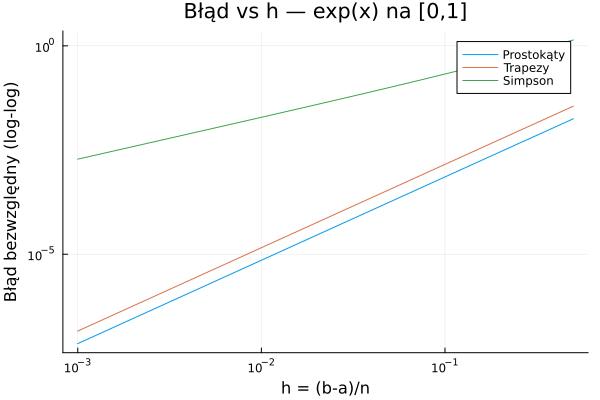
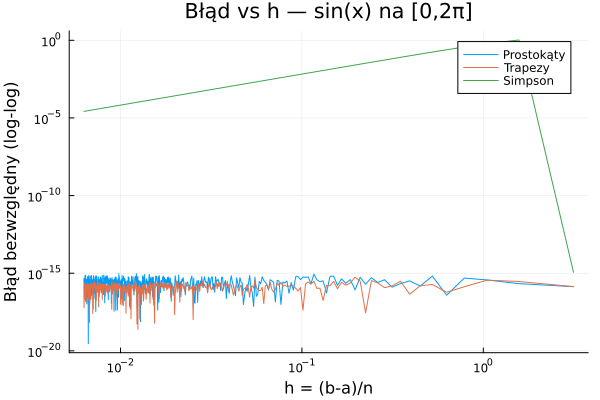